In [1]:
import popsims
import matplotlib.pyplot as plt
#import wisps
import pandas as pd
from astropy.coordinates import SkyCoord
%matplotlib inline
import astropy.units as u
import numpy as np
from tqdm import tqdm

Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database


In [2]:
Rsun=8300.
Zsun=27.

In [3]:
def get_rz(ds, l, b):
    rd=np.sqrt( (ds * np.cos( b ) )**2 + Rsun * (Rsun - 2 * ds * np.cos( b ) * np.cos( l ) ) )
    zd=Zsun+ ds * np.sin( b - np.arctan( Zsun / Rsun) )
    return rd, zd

In [4]:
NSAMPLES=int(1e4)

In [13]:
coord=SkyCoord(l=np.random.uniform(-180, 180, 50 )*u.degree,\
               b=np.random.uniform(-90, 90, 50)*u.degree, frame='galactic')
rs=[[], [], []]
zs=[[], [], []]
for c in tqdm(coord):
    p= popsims.Pointing(coord=c)
    dists0=p.draw_distances(0.1, 5000, \
                350, 2600, nsample=int(NSAMPLES))
    dists1=p.draw_distances(0.1, 5000, \
                    500, 3000, nsample=int(NSAMPLES))
    
    dists2=p.draw_distances(0.1, 5000, \
                    900, 3600, nsample=int(NSAMPLES))
                 
    r0, z0=get_rz(  dists0, c.l.radian, c.b.radian)
    r1, z1=get_rz(  dists1, c.l.radian, c.b.radian)
    r2, z2=get_rz(  dists2, c.l.radian, c.b.radian)
    
    rs[0].append(r0)
    rs[1].append(r1)
    rs[2].append(r2)
                 
    zs[0].append(z0)
    zs[1].append(z1)
    zs[2].append(z2)


100%|██████████| 50/50 [05:02<00:00,  6.05s/it]


In [14]:
z2

array([-1973.14253025,  -932.33209022,  -858.50927921, ...,
       -1805.29535666, -2353.79459428, -1708.79439348])

In [15]:
#thick_dists=[p.draw_distances(0.1, 5000, \
#                350, 2600, nsample=int(NSAMPLES))
#thin_dists=p.draw_distances(0.1, 5000, \
#                900, 3600, nsample=int(NSAMPLES))
#
#thin_dists_incorrect=p.draw_distances(0.1, 5000, \
#                900, 2600, nsample=int(NSAMPLES))

In [8]:
p.dens_profile

'exp'

In [17]:
zs=np.array(zs)

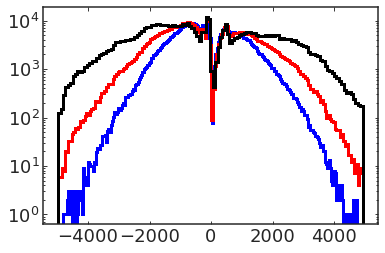

In [18]:
fig, ax=plt.subplots()
_= ax.hist(zs[0].flatten(), bins='auto', log=True, \
           histtype='step', color='b',  linewidth=3)
_= ax.hist(zs[1].flatten(), bins='auto', log=True, \
           histtype='step', color='r',  linewidth=3)
_= ax.hist(zs[-1].flatten(), bins='auto', log=True, \
           histtype='step', color='k',  linewidth=3)

In [20]:
rs=np.array(rs)

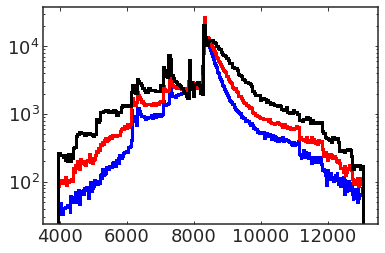

In [21]:
fig, ax=plt.subplots()
_= ax.hist(rs[0].flatten(), bins='auto', log=True, \
           histtype='step', color='b',  linewidth=3)
_= ax.hist(rs[1].flatten(), bins='auto', log=True, \
           histtype='step', color='r',  linewidth=3)
_= ax.hist(rs[-1].flatten(), bins='auto', log=True, \
           histtype='step', color='k',  linewidth=3)